---
### Review: Linear, Logistic Regression
<a name="review"></a>


<details>
<summary> **Check for Understanding**: What is Linear Regression? </summary>

Recall in linear regression, we are predicting a **continuous value** from our indpendent variables. Given a feature matrix, $X \in \mathbb{R}^{p x n} $, our linear regression model predicts continuous values using the following **score function**: 
$$ \hat{y}= \theta^TX + \theta_0 $$ 

For linear regression, we are optimizing the MSE loss function: 
<p></p>

$$ \sum_i (y_i - \hat{y}_i)^2 $$

<p></p>

We can compute the _optimal_ values of $\theta$ using **gradient descent** or through direct computation of the normal equations. 


</details>

---

<details>
<summary> **Check for Understanding**: What is Logistic Regression? </summary>

Recall in logistic regression, we are predicting a **categorical value** from our indpendent variables. Given a feature matrix, $X \in \mathbb{R}^{p x n} $, we first use following **score function** to compute the "scores": 

<p></p>

$$ \theta^TX + \theta_0 $$ 
<p></p>


We then apply the **sigmoid** function to convert the scores into probabilities. 

<img src=http://i.imgur.com/MFdDBsR.png>

We then optimize the cross-entropy loss function:
<p></p>



$$ -\dfrac{1}{N}\sum_i y_i log(p_i) + (1-y_i) log(1-p_i) $$

<p></p>
We can compute the _optimal_ values of $\theta$ using **gradient descent**.  


</details>

---

> **Softmax Regression**: A generalization of binary logistic regression is the Softmax Classifier. for multiple classes. Given a $ X \in \mathbb{R}^{p x n}$, we now have a weight matrix $\theta \in \mathbb{R}^{p x k}$ where $k$ is the number of classes. Hence the score function is given by: 
<p> 
$$ s_i = \theta^Tx_i + \theta_0 $$
</p>
<p> 
</p>
<p>
To generate probability distribution over each of the K classes, we normalize our score function using exponential. Hence, we obtain probability scores. The probability of data point $i$ being in class $k$ is given by: 
</p>
<p>
$$ p^k_i =\dfrac{e^{s^k_i}}{\sum_k e^{s^k_i}} $$
</p>
<p>
We then optimize this using a generalized version of binary cross entropy. 
</p>
<p>
$$ -\dfrac{1}{N} \sum_i \sum_k y^k_{i} log(p^k_i) $$
</p>
<p>
Check out this simpler pictorial representation of this process. 
</p>
<img src=http://i.imgur.com/a0bdksC.png>

The linear models above are great for interpretability and often serve as good baselines. However, they struggle to model nonlinear data unless we explicitly include interaction terms. Here are just few examples of linear models struggling with non-linear problems. 

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product

%matplotlib inline

In [7]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from matplotlib import pyplot as plt 

def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.spectral_r)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.spectral_r)

def make_multiclass(N=100, D=2, K=3):
   
    """Citation Credit: Andrej Karpathy"""
   
    N = N # number of points per class
    D = D # dimensionality
    K = K # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in xrange(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

def plot_activation(activation, name):
    x = np.linspace(-5, 5, num=100)
    sig = map(activation, x)
    plt.plot(x, sig, label=name)
    plt.legend()
    plt.axhline(0, linestyle='--', c='grey')
    plt.axvline(0, linestyle='--', c='grey')

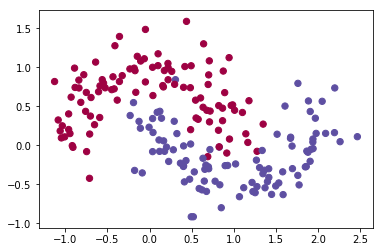

In [8]:
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [9]:
moons_logit = LogisticRegression()
moons_logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

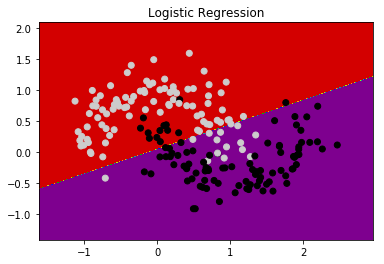

In [10]:
plot_decision_boundary(lambda x: moons_logit.predict(x), X, y)
plt.title("Logistic Regression")

In [11]:
print "Logistic Regression Accuracy on the Moon Dataset: {}".format(moons_logit.score(X, y))

Logistic Regression Accuracy on the Moon Dataset: 0.865


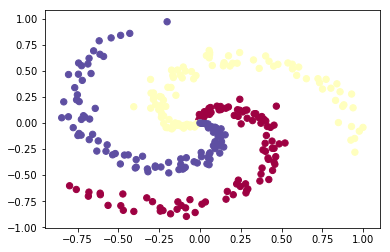

In [12]:
X, y = make_multiclass()

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [13]:
multi_logit = LogisticRegression()
multi_logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Softmax Classifier Accuracy on the Spiral Data: 0.503333333333


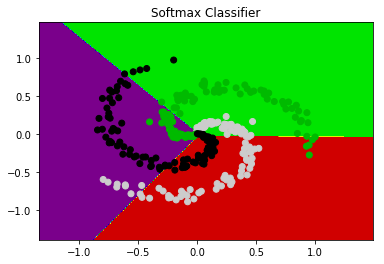

In [14]:
plot_decision_boundary(lambda x: multi_logit.predict(x), X, y)
plt.title("Softmax Classifier")
print "Softmax Classifier Accuracy on the Spiral Data: {}".format(multi_logit.score(X, y))

---
### Introduction to Feedforward Neural Networks 
<a name="play"></a>

Given the limitations of linear classifiers in modeling complex data, we need better parametric models. One example of such models are **feed forward neural networks**. As mentioned in the beginning, a neural network is a composition of many different functions: 

$$ f^n \circ ... \circ f^2(f^1(f^0(x))) = y$$

Function composition can also be described as a **directed acyclic graph.**

<img src=http://i.imgur.com/w7bDvXq.png>

The simplest unit of computation in FFNs is a **neuron** or a **node**. Each neuron or node receives input from multiple neurons in the previous **layer**. These inputs are combined together with **weights.**

<img src=http://i.imgur.com/shCc5xE.png>

For each neuron, we apply an activation function. Hence, in order to calculate a neuron in the first layer, we have: 

$$ f(\sum_{p}\theta_ix_i  + \theta_0)$$

```python

def calculate_one_neuron(inputs, weights, bias, activation):
    """ 
    
    assume inputs, weights are 1-D arrays
    bias is number
    activation is an element wise function 
    
    """
    linear_combination = inputs.dot(weights) + bias
    neuron = activation(linear_combination)
    return neuron
    
    
```


### Neural Network Activations 

**Activations or non-linearities** are the defining feature of neural networks. There are three primary activations and non-linearites that are used across different neural networks. 

---

**Sigmoid**: We have seen the sigmoid non-linearity before. It was the workhorse activation function for deep learning until recently. 
$$ \sigma(x) = \dfrac{1}{1 + e^{-x}} $$


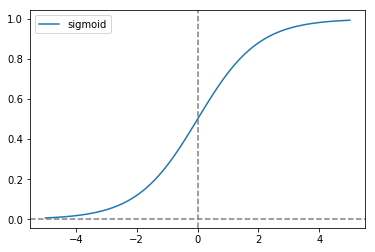

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

plot_activation(sigmoid, 'sigmoid')

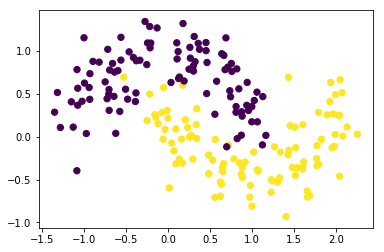

In [16]:
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y)

In [17]:
net = MLPClassifier(hidden_layer_sizes=(1,))

In [23]:
(10,)

(10,)

/Users/ronliu/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


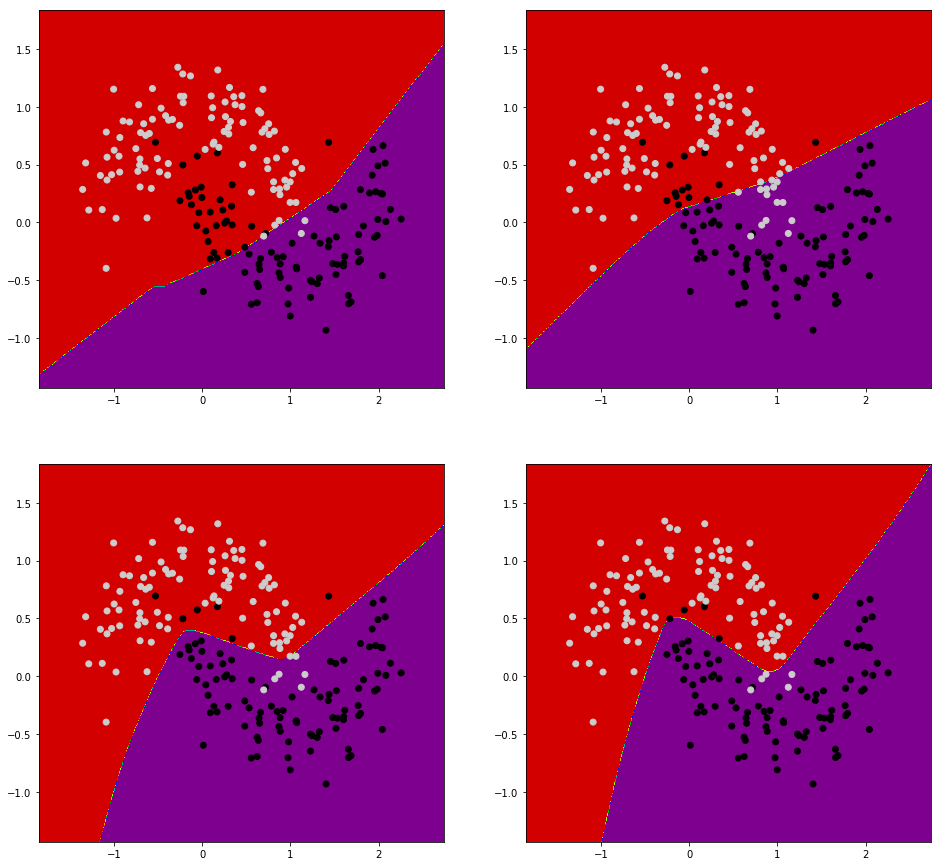

In [18]:
plt.figure(figsize=(16, 32))
hidden_layer_dims = [(10,), (100,), (1000,), (2000,)]
for i, hid_dims in enumerate(hidden_layer_dims):
    plt.subplot(4, 2, i+1)
    model = MLPClassifier(hidden_layer_sizes=hid_dims)
    model.fit(X, y)
    plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.show()

In [19]:
# Object detection using Convolutional Neural Nets

In [29]:
from glob import glob
from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort
import PIL
from PIL import Image
from keras.utils import np_utils

In [30]:
# read in the images

images_X = np.array([])
images_y = []
code_to_target = {}
num_classes = 0
size = 32, 32
for folder in glob('data/objects/*'):
    name_of_object= folder.split('/')[-1]
    
    if name_of_object not in ['Motorbikes', 'octopus', 'accordion', 'stop_sign', 'bill_gates']:
        continue
    code_to_target[num_classes] = name_of_object
    print name_of_object
    for f in glob(folder+'/*'):  # only take the first 20 images
        img = Image.open(f)
        img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
        img.save(f, "JPEG") # resave the image back to the folder
        row = imread(f) # load an image  # load it into numpy
        row = np.expand_dims(row, axis=0)
        if images_X.shape[0] != 0 and row.shape == (1, 32, 32, 3):  # create the numpy arrays of data with many dim
            images_y.append(num_classes)
            images_X = np.vstack((images_X,row))
        elif images_X.shape[0] == 0:
            images_X = row
            images_y.append(num_classes)
    num_classes += 1
    
images_y = np.array(images_y)

accordion
bill_gates
Motorbikes
octopus
stop_sign


In [31]:
# normalize inputs from 0-255 to 0.0-1.0
images_X = images_X.astype('float32')
images_X = images_X / 255.0

images_y = np_utils.to_categorical(images_y)
num_classes = images_y.shape[1]

In [32]:
images_X.shape, images_y.shape

((1223, 32, 32, 3), (1223, 5))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_X, images_y)

In [35]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [36]:
# create the model
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))  # Note (RL): reduce variance for generalize
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

/Users/ronliu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_constraint=<keras.con..., activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ronliu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", kernel_constraint=<keras.con...)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

/Users/ronliu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  


In [37]:
y_train.shape

(917, 5)

In [56]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 917 samples, validate on 306 samples
Epoch 1/25
917/917 [==============================] - 1s - loss: 0.0687 - acc: 0.9771 - val_loss: 0.3314 - val_acc: 0.8987
Epoch 2/25
917/917 [==============================] - 1s - loss: 0.0775 - acc: 0.9727 - val_loss: 0.2736 - val_acc: 0.9248
Epoch 3/25
917/917 [==============================] - 1s - loss: 0.0679 - acc: 0.9771 - val_loss: 0.3067 - val_acc: 0.9150
Epoch 4/25
917/917 [==============================] - 1s - loss: 0.0888 - acc: 0.9695 - val_loss: 0.2700 - val_acc: 0.9216
Epoch 5/25
917/917 [==============================] - 1s - loss: 0.0798 - acc: 0.9749 - val_loss: 0.2622 - val_acc: 0.9281
Epoch 6/25
917/917 [==============================] - 1s - loss: 0.0576 - acc: 0.9826 - val_loss: 0.2771 - val_acc: 0.9281
Epoch 7/25
917/917 [==============================] - 1s - loss: 0.0420 - acc: 0.9891 - val_loss: 0.2721 - val_acc: 0.9183
Epoch 8/25
917/917 [==============================] - 1s - loss: 0.0609 - acc: 0.9771 - val_l

In [39]:
url = 'data/stop.jpg'
image = imread(url) # load an image
image.shape

(1200, 1800, 3)

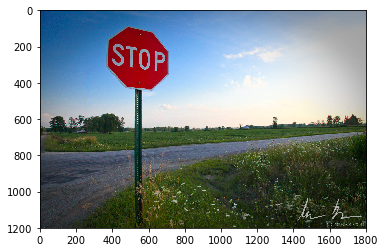

In [40]:
imshow(image)

400 50


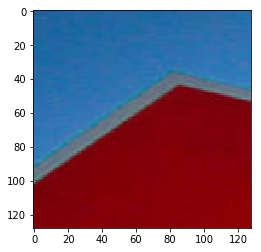

In [57]:
import random
random_x_coordinate = random.choice(range(1,image.shape[0]))
random_y_coordinate = random.choice(range(1,image.shape[0]))  # choose a random starting point
random_x_coordinate, random_y_coordinate = 400, 50
subset = image[random_y_coordinate:random_y_coordinate+128,random_x_coordinate:random_x_coordinate+128,]
print random_x_coordinate, random_y_coordinate
imshow(subset)

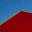

In [58]:
f = 'images/new.jpg'
img = Image.fromarray(subset, 'RGB')
img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
img.save(f, "JPEG") # resave the image back to the folder
row = imread(f) # load an image  # load it into numpy
row = np.expand_dims(row, axis=0)
img

In [59]:
row = row.astype('float32')
row = row / 255.0

In [60]:
code_to_target[np.argmax(model.predict(row))], max(model.predict(row)[0])

('bill_gates', 0.99743396)

In [45]:
def predict_window(x_coordinate, y_coordinate, window_size=128, resize_to=(32,32)):
    subset = image[y_coordinate:y_coordinate+window_size,x_coordinate:x_coordinate+window_size,]
    img = Image.fromarray(subset, 'RGB')
    img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
    f = 'images/here.jpg'
    img.save(f, "JPEG") # resave the image back to the folder
    row = imread(f) # load an image  # load it into numpy
    row = np.expand_dims(row, axis=0)
    imshow(img)
    row = row.astype('float32')
    row = row / 255.0
    proba = max(model.predict(row)[0])
    return code_to_target[np.argmax(model.predict(row))], proba

('stop_sign', 0.9997347)

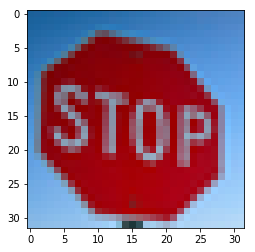

In [46]:
predict_window(350,50,400)

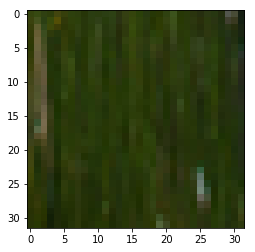

In [47]:
window_size = 400
step = 50
threshold = .999
found = []
for x in range(1,image.shape[0]-window_size, step):
    for y in range(1,image.shape[1]-window_size, step):
        try:
            prediction, proba = predict_window(x,y,window_size)
            if proba >= threshold:
                found.append((x, y, window_size, prediction, proba))
        except:
            pass

In [48]:
found

[(1, 351, 400, 'bill_gates', 0.99942231),
 (51, 351, 400, 'bill_gates', 0.99938774),
 (351, 51, 400, 'stop_sign', 0.99971598),
 (351, 101, 400, 'stop_sign', 0.99926931),
 (351, 401, 400, 'bill_gates', 0.99958903),
 (401, 351, 400, 'bill_gates', 0.99920291),
 (401, 401, 400, 'bill_gates', 0.99992251),
 (501, 401, 400, 'bill_gates', 0.99968684),
 (551, 401, 400, 'bill_gates', 0.99971646),
 (601, 401, 400, 'bill_gates', 0.99964845),
 (651, 401, 400, 'bill_gates', 0.99958593),
 (701, 401, 400, 'bill_gates', 0.99950087),
 (751, 401, 400, 'bill_gates', 0.99948585)]

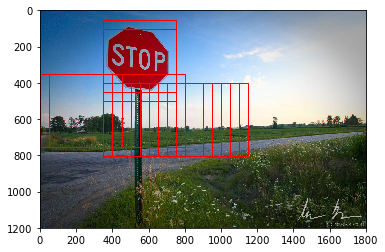

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
for f in found:
    rect = patches.Rectangle((f[0],f[1]),f[2],f[2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

# Add the patch to the Axes


plt.show()

In [51]:
def magic(url, window_size=200, step=50, threshold=.99):
    image = imread(url) # load an image
    image.shape
    found = []
    def predict_window(image, x_coordinate, y_coordinate, window_size=128, resize_to=(32,32)):
        subset = image[y_coordinate:y_coordinate+window_size,x_coordinate:x_coordinate+window_size,]
        img = Image.fromarray(subset, 'RGB')
        img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
        f = 'images/here.jpg'
        img.save(f, "JPEG") # resave the image back to the folder
        row = imread(f) # load an image  # load it into numpy
        row = np.expand_dims(row, axis=0)
        row = row.astype('float32')
        row = row / 255.0
        proba = max(model.predict(row)[0])
        return code_to_target[np.argmax(model.predict(row))], proba
    for x in range(1,image.shape[0]-window_size, step):
        for y in range(1,image.shape[1]-window_size, step):
            try:
                prediction, proba = predict_window(image, x,y,window_size)
                if proba >= threshold:
                    found.append((x, y, window_size, prediction, proba))
            
            except Exception as e:
                pass
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)
    print found
    # Create a Rectangle patch
    for f in found:
        rect = patches.Rectangle((f[0],f[1]),f[2],f[2],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

    # Add the patch to the Axes


    plt.show()

[(1, 401, 350, 'bill_gates', 0.99981707), (51, 351, 350, 'bill_gates', 0.99924684), (51, 401, 350, 'bill_gates', 0.99985397), (101, 101, 350, 'Motorbikes', 0.99955827), (101, 201, 350, 'Motorbikes', 0.99952471), (101, 401, 350, 'bill_gates', 0.99971348), (201, 301, 350, 'bill_gates', 0.99980813), (301, 301, 350, 'bill_gates', 0.99977893), (351, 51, 350, 'stop_sign', 0.99967182), (351, 101, 350, 'stop_sign', 0.99999619), (351, 351, 350, 'bill_gates', 0.99999845), (351, 401, 350, 'bill_gates', 0.99985635), (351, 451, 350, 'bill_gates', 0.99998379), (401, 51, 350, 'stop_sign', 0.9999069), (401, 101, 350, 'stop_sign', 0.99999952), (401, 151, 350, 'stop_sign', 0.99997294), (401, 201, 350, 'stop_sign', 0.99996912), (401, 351, 350, 'bill_gates', 0.99999321), (401, 401, 350, 'bill_gates', 0.99994326), (401, 451, 350, 'bill_gates', 0.99999082), (451, 51, 350, 'stop_sign', 0.99933475), (451, 101, 350, 'stop_sign', 0.99999452), (451, 151, 350, 'stop_sign', 0.99994051), (451, 201, 350, 'stop_sign'

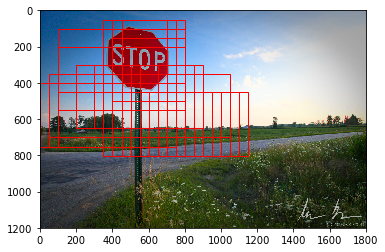

In [62]:
url = 'data/stop.jpg'
magic(url, window_size=350, step=50, threshold=.999)

[(1, 101, 300, 'bill_gates', 0.99955827), (51, 701, 300, 'bill_gates', 0.99979883), (101, 101, 300, 'bill_gates', 0.99930787), (101, 451, 300, 'bill_gates', 0.99927384), (101, 701, 300, 'bill_gates', 0.99996912), (101, 1151, 300, 'bill_gates', 0.9996106), (151, 651, 300, 'bill_gates', 0.99941754), (151, 701, 300, 'bill_gates', 0.99999571), (151, 851, 300, 'Motorbikes', 0.99909556), (151, 1051, 300, 'bill_gates', 0.99975938), (151, 1101, 300, 'bill_gates', 0.99987698), (201, 101, 300, 'bill_gates', 0.99932373), (301, 101, 300, 'bill_gates', 0.99969721), (351, 101, 300, 'bill_gates', 0.99997985), (351, 851, 300, 'bill_gates', 0.99946636), (401, 651, 300, 'Motorbikes', 0.99999356), (401, 851, 300, 'bill_gates', 0.99986124), (451, 851, 300, 'bill_gates', 0.99923491), (501, 601, 300, 'bill_gates', 0.99951446), (551, 601, 300, 'bill_gates', 0.99998164), (551, 651, 300, 'bill_gates', 0.99983168), (551, 701, 300, 'bill_gates', 0.99918443), (551, 801, 300, 'bill_gates', 0.99907398), (601, 601, 

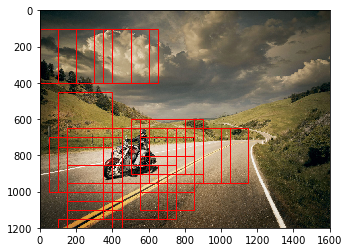

In [63]:
url = 'data/motor.jpg'
magic(url, window_size=300, step=50, threshold=.999)

[(181, 181, 250, 'bill_gates', 0.99806482), (181, 201, 250, 'bill_gates', 0.998348), (201, 161, 250, 'bill_gates', 0.99948657), (201, 181, 250, 'bill_gates', 0.99983847), (201, 201, 250, 'bill_gates', 0.99930072), (221, 161, 250, 'bill_gates', 0.99852377), (221, 181, 250, 'bill_gates', 0.99867117)]


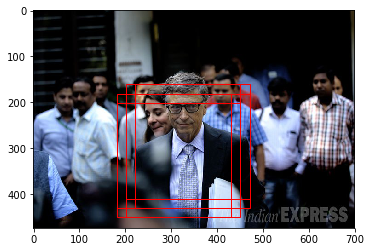

In [55]:
url = 'data/bill.jpg'
magic(url, window_size=250, step=20, threshold=.998)